In [1]:
from pathlib import Path
from dreaminsg_integrated_model.src.network_recovery import *
import dreaminsg_integrated_model.src.simulation as simulation
from dreaminsg_integrated_model.src.network_sim_models.integrated_network import *

from dreaminsg_integrated_model.src.network_sim_models.interdependencies import *

from dreaminsg_integrated_model.src.optimizer import *
import dreaminsg_integrated_model.src.plots as model_plots



In [2]:
import networkx as nx
from bokeh.io import output_file, show, output_notebook, save
from bokeh.plotting import figure

from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models.widgets import Tabs, Panel 
from bokeh.transform import factor_cmap, factor_mark
from bokeh.palettes import *
import pandas as pd
import numpy as np 

import geopandas as gpd
from pathlib import Path
import matplotlib.colors

In [3]:
output_notebook()

Loading BokehJS ...

In [4]:
micropolis_network = IntegratedNetwork()

In [5]:
MAIN_DIR = Path('../..')
network_dir= 'micropolis'
water_file = MAIN_DIR/f'dreaminsg_integrated_model/data/networks/{network_dir}/water/water.inp'
power_file = MAIN_DIR/f'dreaminsg_integrated_model/data/networks/{network_dir}/power/power.json'
transp_folder = MAIN_DIR/f'dreaminsg_integrated_model/data/networks/{network_dir}/transportation/'

# load all infrastructure networks
micropolis_network.load_networks(water_file, power_file, transp_folder, power_sim_type = '3ph')

C:\Users\srijith\anaconda3\envs\redcar\lib\site-packages\wntr\epanet\io.py:2173: UserWarning: Not all curves were used in "..\..\dreaminsg_integrated_model\data\networks\micropolis\water\water.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


Water network successfully loaded from ..\..\dreaminsg_integrated_model\data\networks\micropolis\water\water.inp. The analysis type is set to Pressure Dependent Demand Analysis.
initial simulation duration: 60s; hydraulic time step: 60s; pattern time step: 3600s

Power system successfully loaded from ..\..\dreaminsg_integrated_model\data\networks\micropolis\power\power.json. Three phase power flow simulation will be used.

Transportation network successfully loaded from ..\..\dreaminsg_integrated_model\data\networks\micropolis\transportation. Static traffic assignment method will be used to calculate travel times.


Successfully added power network to the integrated graph...
Successfully added water network to the integrated graph...
Successfully added transportation network to the integrated graph...
Integrated graph successffully created.


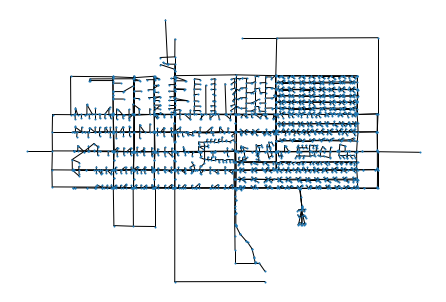

In [6]:
micropolis_network.generate_integrated_graph(plot = True)

In [7]:
wn = micropolis_network.wn
pn = micropolis_network.pn
tn = micropolis_network.tn

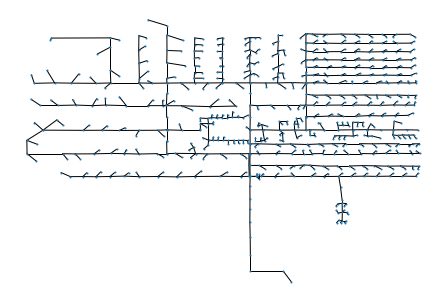

In [8]:
G_power = micropolis_network.generate_power_networkx_graph(plot = True)

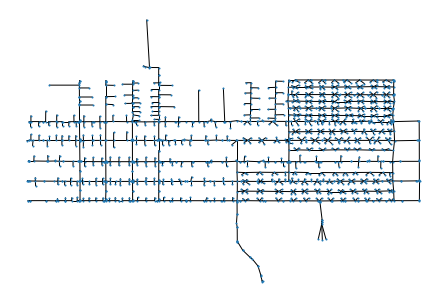

In [9]:
G_water = micropolis_network.generate_water_networkx_graph(plot = True)

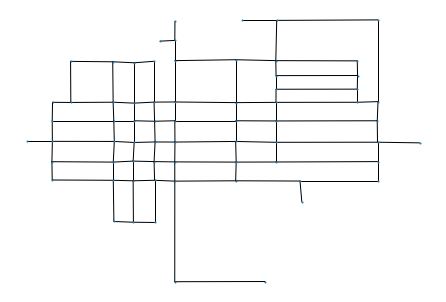

In [10]:
G_transpo = micropolis_network.generate_transpo_networkx_graph(plot = True)

In [11]:
G = micropolis_network.integrated_graph
model_plots.plot_bokeh_from_integrated_graph(G, title = "Micropolis integrated network")

Loading BokehJS ...

In [12]:
stop

NameError: name 'stop' is not defined

In [ ]:
p = figure(background_fill_color="white", 
           plot_width=700, 
           height = 400,
           title = 'Micropolis Integrated Graph',
           x_range=(1000, 8000), 
           y_range=(1000, 6600))

In [ ]:
x, y, node_type, node_category, id = [], [], [], [], []

for index, node in enumerate(G.nodes.keys()):
    x.append(G.nodes[node]['coord'][0])
    y.append(G.nodes[node]['coord'][1])
    node_type.append(G.nodes[node]['node_type'])
    node_category.append(G.nodes[node]['node_category'])
    id.append(node)

In [ ]:
plot_nodes = p.square('x', 'y', source = ColumnDataSource(
    dict(
        x = x, 
        y = y, 
        node_type = node_type,
        node_category = node_category,
        id = id
        )
    ), 
    color='gainsboro',
    alpha = 0.6,
    muted_color = 'gainsboro', 
    muted_alpha=0.2,
    size = 5)

In [ ]:
# links
x, y, link_layer, link_category, id = [], [], [], [], []
for index, link in enumerate(G.edges.keys()):
    x.append(
        [
         G.nodes[link[0]]['coord'][0], G.nodes[link[1]]['coord'][0]
        ]
    )
    y.append(
        [
         G.nodes[link[0]]['coord'][1], G.nodes[link[1]]['coord'][1]
        ]
    )
    link_layer.append(G.edges[link]['link_type'])
    link_category.append(G.edges[link]['link_category'])
    id.append(link)
    
plot_links = p.multi_line('x', 'y', source = ColumnDataSource(dict(x = x, y = y, 
      link_layer = link_layer, link_category = link_category, id = id)), 
                          line_color = factor_cmap('link_layer', 'Category10_3', infra),
                          line_alpha = 1, 
                          line_width = link_line_width,
                          muted_color=factor_cmap('link_layer', 'Category10_3', infra), 
                          muted_alpha=0.2,
                          legend_field="link_layer")

In [ ]:
node_hover = HoverTool(renderers=[plot_nodes])
node_hover.tooltips = [
    ('Node ID', '@id'), 
    ('Infrastructure', '@node_type'), 
    ('Node category', '@node_category')]
p.add_tools(node_hover)

link_hover = HoverTool(renderers=[plot_links])
link_hover.tooltips = [
    ('Link ID', '@id'), 
    ('Infrastructure', '@link_layer'), 
    ('Link category', '@link_category')]
p.add_tools(link_hover)

In [ ]:
p.legend.location = "top_left"
p.legend.click_policy="mute"
show(p)